# Week 2
## December 8

In [2]:
# commons
import numpy as np
import pandas as pd
import math
def get_data_decoded(filename):
    with open(filename, "rb") as f:
        return [_.decode("utf-8").strip()  for _ in f]
    
def to_matrix(data):
    return np.array([np.array(list(d)).astype(int) for d in data])


In [29]:
test = """be cfbegad cbdgef fgaecd cgeb fdcge agebfd fecdb fabcd edb | fdgacbe cefdb cefbgd gcbe
edbfga begcd cbg gc gcadebf fbgde acbgfd abcde gfcbed gfec | fcgedb cgb dgebacf gc
fgaebd cg bdaec gdafb agbcfd gdcbef bgcad gfac gcb cdgabef | cg cg fdcagb cbg
fbegcd cbd adcefb dageb afcb bc aefdc ecdab fgdeca fcdbega | efabcd cedba gadfec cb
aecbfdg fbg gf bafeg dbefa fcge gcbea fcaegb dgceab fcbdga | gecf egdcabf bgf bfgea
fgeab ca afcebg bdacfeg cfaedg gcfdb baec bfadeg bafgc acf | gebdcfa ecba ca fadegcb
dbcfg fgd bdegcaf fgec aegbdf ecdfab fbedc dacgb gdcebf gf | cefg dcbef fcge gbcadfe
bdfegc cbegaf gecbf dfcage bdacg ed bedf ced adcbefg gebcd | ed bcgafe cdgba cbgef
egadfb cdbfeg cegd fecab cgb gbdefca cg fgcdab egfdb bfceg | gbdfcae bgc cg cgb
gcafb gcf dcaebfg ecagb gf abcdeg gaef cafbge fdbac fegbdc | fgae cfgab fg bagce""".split("\n")

def count_known(line):
    try:
        return len([1 for e in line.split(" ") if len(e.strip()) in (2,3,4,7)])
    except e as Exception:
        print(e)
        print(line)
        return 0

def get_known_digits(data):       
    data = [d.split("|") for d in data]
    return sum([count_known(o) for i, o in data])
    


assert(get_known_digits(test) == 26)

In [30]:
# Part 1
data = get_data_decoded("data/input8.txt")
get_known_digits(data)

369

In [39]:
# Part 2

# Long day so hard to run bit crunching half me, half internet hivemind
def to_bin(s):
    mask = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
    binary = ''.join(['1' if x in s else '0' for x in mask])
    return int(binary, 2)
        
def decode_signal(signal):
    one = next(x for x in signal if len(x) == 2)
    four = next(x for x in signal if len(x) == 4)
    seven = next(x for x in signal if len(x) == 3)
    eight = next(x for x in signal if len(x) == 7)
    for fiver in [x for x in signal if len(x) == 5]:
        if bin(to_bin(one) & to_bin(fiver)).count('1') == 2:
            three = fiver
        elif bin(to_bin(four) & to_bin(fiver)).count('1') == 2:
            two = fiver
        else:
            five = fiver
    for sixer in [x for x in signal if len(x) == 6]:
        if bin(to_bin(one) & to_bin(sixer)).count('1') == 1:
            six = sixer
        elif bin(to_bin(four) & to_bin(sixer)).count('1') == 4:
            nine = sixer
        else:
            zero = sixer

    return {zero: '0', one: '1', two: '2', three: '3', four: '4', five: '5', six: '6', seven: '7', eight: '8', nine: '9'}

def parse_output(output, decoded):
    return int(''.join([decoded[o] for o in output]))

def unknown_digits(data):       
    data = [d.split("|") for d in data]
    total = 0
    for signal, output in data:
        signal = [''.join(sorted(s.strip())) for s in signal.strip().split(" ")]
        output = [''.join(sorted(o.strip())) for o in output.strip().split(" ")]
        decoded = decode_signal(signal)
        total += parse_output(output, decoded)
    
    return total
assert(unknown_digits(test) == 61229)

In [40]:
unknown_digits(data)

1031553

# December 9
## Part 1

In [3]:
test = """2199943210
3987894921
9856789892
8767896789
9899965678""".split("\n")

# this can be optimized
def min_neighbours(x, y, arr):
    xlim, ylim = arr.shape
    neighbours = []
    if y-1 >= 0: # up
        neighbours.append(arr[x, y-1])
    if x-1 >= 0: # left
        neighbours.append(arr[x-1, y])
    if x+1 < xlim: # right
        neighbours.append(arr[x+1, y])
    if y+1 < ylim: # down
        neighbours.append(arr[x, y+1])
    return min(neighbours)

def find_min_risk(data):
    arr = to_matrix(data)

    xlim, ylim = arr.shape
    min_points = []
    risk = 0
    for i in range(0, xlim):
        for j in range(0, ylim):
            if arr[i,j] < min_neighbours(i,j,arr):
                min_points.append((i,j))
                risk += arr[i,j] + 1
    return risk

assert(find_min_risk(test) == 15)

In [25]:
data = get_data_decoded("data/input9.txt")
find_min_risk(data)

603

In [27]:
# Part 2
import random
# Messy but it gets the job done
def three_basins(data):
    
    basin_sizes = []
    arr = to_matrix(data)
    xlim, ylim = arr.shape
    
    unexplored = set()
    visited = np.zeros(arr.shape)
    for i in range(0, xlim):
        for j in range(0, ylim):
            if arr[i,j] == 9:
                visited[i,j] = 1
            else:
                unexplored.add((i,j))
            
    
    while len(unexplored) > 0:
        def get_all_neighbours(x, y, visited):
            neighbours = []
            if y-1 >= 0 and not visited[x, y-1]: # up
                neighbours.append((x, y-1))
                visited[x, y-1] = 1
                neighbours.extend(get_all_neighbours(x, y-1, visited))
            if x-1 >= 0 and not visited[x-1, y]: # left
                neighbours.append((x-1, y))
                visited[x-1, y] = 1
                neighbours.extend(get_all_neighbours(x-1, y, visited))
            if x+1 < xlim and not visited[x+1, y]: # right
                neighbours.append((x+1, y))
                visited[x+1, y] = 1
                neighbours.extend(get_all_neighbours(x+1, y, visited))
            if y+1 < ylim and not visited[x, y+1]: # down
                neighbours.append((x, y+1))
                visited[x, y+1] = 1
                neighbours.extend(get_all_neighbours(x, y+1, visited))
            return neighbours
        x, y = random.choice(tuple(unexplored))
        basin = get_all_neighbours(x, y, visited)
        print(basin)
        unexplored = unexplored - set(basin)
        basin_score = len(set(basin))
        basin_sizes.append(basin_score)
    print(basin_sizes)
    return np.prod(sorted(basin_sizes)[-3:])

assert(three_basins(test) == 1134)

[(0, 6), (0, 5), (1, 6), (0, 7), (0, 8), (1, 8), (1, 9), (0, 9), (2, 9)]
[(0, 0), (1, 0), (0, 1)]
[(3, 1), (3, 0), (2, 1), (2, 2), (1, 2), (1, 3), (2, 3), (3, 3), (3, 2), (3, 4), (2, 4), (1, 4), (2, 5), (4, 1)]
[(4, 5), (4, 6), (3, 6), (3, 7), (2, 7), (4, 7), (4, 8), (3, 8), (4, 9)]
[9, 3, 14, 9]


In [28]:
three_basins(data)

[(37, 37), (37, 36), (37, 35), (37, 34), (37, 33), (38, 33), (38, 32), (39, 32), (39, 31), (39, 30), (38, 30), (40, 30), (40, 32), (41, 32), (41, 31), (42, 32), (42, 33), (41, 33), (40, 33), (39, 33), (39, 34), (38, 34), (38, 35), (39, 35), (40, 35), (40, 34), (41, 34), (40, 36), (39, 36), (38, 36), (38, 37), (39, 37), (38, 38), (37, 38), (36, 38), (36, 37), (35, 37), (35, 36), (35, 35), (35, 34), (35, 33), (34, 34), (36, 34), (36, 35), (35, 38), (34, 38), (35, 39), (36, 39), (37, 39), (37, 40), (36, 40), (38, 40), (37, 41), (43, 33)]
[(65, 27), (65, 26), (64, 27), (63, 27), (63, 26), (64, 28), (65, 28), (65, 29), (64, 29), (63, 29), (63, 30), (62, 30), (62, 31), (61, 31), (61, 32), (60, 32), (62, 32), (63, 32), (63, 31), (64, 31), (64, 30), (65, 30), (66, 30), (66, 29), (67, 30), (66, 31), (65, 31), (64, 32), (64, 33), (63, 33), (63, 34), (62, 34), (64, 34), (63, 35), (65, 33), (61, 33), (66, 27)]
[(57, 59), (58, 59), (58, 58), (58, 57), (59, 58), (60, 58), (60, 57), (61, 57), (61, 56

786780

# December 10
## Part 1 & 2

In [5]:
test = """[({(<(())[]>[[{[]{<()<>>
[(()[<>])]({[<{<<[]>>(
{([(<{}[<>[]}>{[]{[(<()>
(((({<>}<{<{<>}{[]{[]{}
[[<[([]))<([[{}[[()]]]
[{[{({}]{}}([{[{{{}}([]
{<[[]]>}<{[{[{[]{()[[[]
[<(<(<(<{}))><([]([]()
<{([([[(<>()){}]>(<<{{
<{([{{}}[<[[[<>{}]]]>[]]""".split("\n")

In [21]:
error_points = {")": 3,"]": 57,"}": 1197,">": 25137}
correction_points = {")": 1, "]": 2, "}": 3, ">": 4}
pairs = {"(": ")", "[": "]", "{": "}", "<": ">"}
def parse_data(data):
    points = 0
    correction_scores = []
    for row in data:
        found = []
        for c in row:
            if c not in [")", "]", "}", ">"]:
                found.append(c)
            else:
                if c == pairs[found[-1]]:
                    found.pop()
                else:
                    points += error_points[c]
                    found = []
                    break
        score = 0
        if found:
            for v in [pairs[x] for x in found[::-1]]:
                score = (score * 5) + correction_points[v]
            correction_scores.append(score)
    return (points, sorted(correction_scores)[len(correction_scores)//2])
assert(parse_data(test)[0] == 26397)

In [22]:
data = get_data_decoded("data/input10.txt")
parse_data(data)

(316851, 2182912364)

# December 11
## Part 1

In [46]:
test ="""5483143223
2745854711
5264556173
6141336146
6357385478
4167524645
2176841721
6882881134
4846848554
5283751526""".split("\n")


def process_octopi(data, steps):
    octopi = to_matrix(data)
    xlim, ylim = octopi.shape
    rangeX = range(0, xlim)  # X bounds
    rangeY = range(0, ylim)  # Y bounds
    def proc_adjacent(i, j, octopi, flashed):
        for dx in range(-1, 2):
            for dy in range(-1, 2):
                x, y = i+dx, j+dy  # adjacent cell
                if (x in rangeX) and (y in rangeY) and (dx, dy) != (0, 0):
                    curr_val = octopi[x,y]
                    if curr_val == 9:
                        octopi[x,y] = 10
                        flashed[x, y] = 1
                        proc_adjacent(x,y, octopi, flashed)
                    elif curr_val == 10:
                        # do nothing
                        flashed[x, y] = 1
                    else:
                        octopi[x,y] = curr_val + 1
    flash_count = 0
    for step in range(0, steps):
        octopi = octopi + 1
        flashed = np.where(octopi > 9, 1, np.zeros(octopi.shape))
        for x,y in np.argwhere(octopi > 9):
            proc_adjacent(x, y, octopi, flashed)
        octopi = np.where(octopi > 9, 0, octopi)
        flash_count += np.sum(flashed)
        #print("\n".join(["".join([str(_) for _ in r]) for r in octopi]))
        #print("\n")
    return flash_count
assert(process_octopi(test, 100) == 1656)

In [48]:
data = get_data_decoded("data/input11.txt")
process_octopi(data, 100)

1785.0

In [49]:
# lazy part 2
def process_octopi_sync(data):
    octopi = to_matrix(data)
    xlim, ylim = octopi.shape
    rangeX = range(0, xlim)  # X bounds
    rangeY = range(0, ylim)  # Y bounds
    def proc_adjacent(i, j, octopi, flashed):
        for dx in range(-1, 2):
            for dy in range(-1, 2):
                x, y = i+dx, j+dy  # adjacent cell
                if (x in rangeX) and (y in rangeY) and (dx, dy) != (0, 0):
                    curr_val = octopi[x,y]
                    if curr_val == 9:
                        octopi[x,y] = 10
                        flashed[x, y] = 1
                        proc_adjacent(x,y, octopi, flashed)
                    elif curr_val == 10:
                        # do nothing
                        flashed[x, y] = 1
                    else:
                        octopi[x,y] = curr_val + 1
    step_count = 0
    while 1:
        step_count += 1
        octopi = octopi + 1
        flashed = np.where(octopi > 9, 1, np.zeros(octopi.shape))
        for x,y in np.argwhere(octopi > 9):
            proc_adjacent(x, y, octopi, flashed)
        octopi = np.where(octopi > 9, 0, octopi)
        if np.sum(flashed) == 100:
            return step_count
assert(process_octopi_sync(test) == 195)

In [50]:
process_octopi_sync(data)

354

## December 12
### Part 1

In [19]:
import networkx as nx

test = """dc-end
HN-start
start-kj
dc-start
dc-HN
LN-dc
HN-end
kj-sa
kj-HN
kj-dc""".split("\n")

paths = []
def all_paths(data):
    node_list = [r.split("-") for r in data]
    g = nx.Graph()
    g.add_edges_from(node_list)
    def get_path_from_point(point, current_path=["start"]):
        for neighbour in nx.all_neighbors(g, point):
            if neighbour == "end":
                current_path.append(neighbour)
                print(",".join(current_path))
                paths.append(",".join(current_path))
            elif neighbour.isupper() or (neighbour.islower() and neighbour not in current_path):
                get_path_from_point(neighbour, current_path + [neighbour])
            else:
                continue
        return
    get_path_from_point("start")

all_paths(test)

start,HN,dc,end
start,HN,dc,end,HN,end
start,HN,dc,end,HN,end,kj,HN,end
start,HN,dc,end,kj,HN,end
start,HN,end
start,HN,end,kj,HN,dc,end
start,HN,end,kj,HN,dc,end,HN,end
start,HN,end,kj,HN,end
start,HN,end,kj,dc,end
start,HN,end,kj,dc,end,HN,end
start,kj,HN,dc,end
start,kj,HN,dc,end,HN,end
start,kj,HN,end
start,kj,dc,end
start,kj,dc,end,HN,end
start,dc,end
start,dc,end,HN,end
start,dc,end,HN,end,kj,HN,end
start,dc,end,kj,HN,end


In [14]:
a= """start,HN,dc,end
start,HN,dc,end,HN,end
start,HN,dc,end,HN,end,kj,HN,end
start,HN,dc,end,kj,HN,end
start,HN,end
start,HN,end,kj,HN,dc,end
start,HN,end,kj,HN,dc,end,HN,end
start,HN,end,kj,HN,end
start,HN,end,kj,dc,end
start,HN,end,kj,dc,end,HN,end
start,kj,HN,dc,end
start,kj,HN,dc,end,HN,end
start,kj,HN,end
start,kj,dc,end
start,kj,dc,end,HN,end
start,dc,end
start,dc,end,HN,end
start,dc,end,HN,end,kj,HN,end
start,dc,end,kj,HN,end""".split("\n")
len(a)

19

In [22]:
data = get_data_decoded("data/input12.txt")
paths = []
all_paths(data)

start,YY,gp,sk,VG,qz,end
start,YY,gp,sk,VG,qz,end,VG,av,rz,VH,end
start,YY,gp,sk,VG,qz,end,VG,av,rz,VH,end,fh,end
start,YY,gp,sk,VG,qz,end,VG,av,rz,VH,end,fh,end,VH,end
start,YY,gp,sk,VG,qz,end,VG,av,fh,end
start,YY,gp,sk,VG,qz,end,VG,av,fh,end,VH,rz,VH,end
start,YY,gp,sk,VG,qz,end,VG,av,fh,end,VH,end
start,YY,gp,sk,VG,qz,end,VG,av,VH,rz,VH,end
start,YY,gp,sk,VG,qz,end,VG,av,VH,rz,VH,end,fh,end
start,YY,gp,sk,VG,qz,end,VG,av,VH,rz,VH,end,fh,end,VH,end
start,YY,gp,sk,VG,qz,end,VG,av,VH,end
start,YY,gp,sk,VG,qz,end,VG,av,VH,end,fh,end
start,YY,gp,sk,VG,qz,end,VG,av,VH,end,fh,end,VH,rz,VH,end
start,YY,gp,sk,VG,qz,end,VG,av,VH,end,fh,end,VH,end
start,YY,gp,sk,VG,qz,end,rz,av,fh,end
start,YY,gp,sk,VG,qz,end,rz,av,fh,end,VH,end
start,YY,gp,sk,VG,qz,end,rz,av,VH,end
start,YY,gp,sk,VG,qz,end,rz,av,VH,end,fh,end
start,YY,gp,sk,VG,qz,end,rz,av,VH,end,fh,end,VH,end
start,YY,gp,sk,VG,qz,end,rz,VH,end
start,YY,gp,sk,VG,qz,end,rz,VH,end,av,fh,end
start,YY,gp,sk,VG,qz,end,rz,VH,end,av,fh,end,VH,end
s

start,VG,qz,end,rz,VH,end,sk,VH,end,fh,end,VH,end
start,VG,qz,end,rz,VH,end,sk,VH,end,fh,end,VH,end,av,VH,end
start,VG,qz,end,rz,VH,end,sk,YY,gp,av,fh,end
start,VG,qz,end,rz,VH,end,sk,YY,gp,av,fh,end,VH,end
start,VG,qz,end,rz,VH,end,sk,YY,gp,av,VH,end
start,VG,qz,end,rz,VH,end,sk,YY,gp,av,VH,end,fh,end
start,VG,qz,end,rz,VH,end,sk,YY,gp,av,VH,end,fh,end,VH,end
start,VG,qz,end,rz,VH,end,sk,fh,av,VH,end
start,VG,qz,end,rz,VH,end,sk,fh,end
start,VG,qz,end,rz,VH,end,sk,fh,end,VH,end
start,VG,qz,end,rz,VH,end,sk,fh,end,VH,end,av,VH,end
start,VG,qz,end,rz,VH,end,av,fh,end
start,VG,qz,end,rz,VH,end,av,fh,end,VH,end
start,VG,qz,end,rz,VH,end,av,fh,end,VH,end,sk,VH,end
start,VG,qz,end,rz,VH,end,av,fh,end,sk,VH,end
start,VG,qz,end,rz,VH,end,av,VH,end
start,VG,qz,end,rz,VH,end,av,VH,end,sk,VH,end
start,VG,qz,end,rz,VH,end,av,VH,end,sk,VH,end,fh,end
start,VG,qz,end,rz,VH,end,av,VH,end,sk,VH,end,fh,end,VH,end
start,VG,qz,end,rz,VH,end,av,VH,end,sk,fh,end
start,VG,qz,end,rz,VH,end,av,VH,end,sk,fh,en

In [23]:
len(paths)

4707

In [63]:
# Part 2
import collections

test2 = """dc-end
HN-start
start-kj
dc-start
dc-HN
LN-dc
HN-end
kj-sa
kj-HN
kj-dc""".split("\n")

paths = []
def all_2_paths(data):
    def validate_small_caves(paths, point):
        only_smol = [p for p in paths if p.islower() and p != "start"] + [point]
        if len(only_smol) <= 2:
            return True
        else:
            path_count = sorted(collections.Counter(only_smol).values(), reverse=True)
            return (path_count[0] <= 2 and path_count[1] == 2)
    node_list = [r.split("-") for r in data]
    g = nx.Graph()
    g.add_edges_from(node_list)
    def get_path_from_point(point, current_path=["start"]):
        for neighbour in nx.all_neighbors(g, point):
            if neighbour == "start":
                continue
            elif neighbour == "end":
                current_path.append(neighbour)
                #print(",".join(current_path))
                paths.append(",".join(current_path))
            elif neighbour.isupper() or (neighbour.islower() and neighbour not in current_path):
                get_path_from_point(neighbour, current_path + [neighbour])
            elif neighbour.islower():
                if validate_small_caves(current_path, neighbour):
                    get_path_from_point(neighbour, current_path + [neighbour])
            else:
                continue
        return
    get_path_from_point("start")

all_2_paths(test)
len(paths)

80

In [65]:
test3 = """fs-end
he-DX
fs-he
start-DX
pj-DX
end-zg
zg-sl
zg-pj
pj-he
RW-he
fs-DX
pj-RW
zg-RW
start-pj
he-WI
zg-he
pj-fs
start-RW""".split("\n")
all_2_paths(test3)
len(paths)

6415726

In [64]:
paths = []
all_2_paths(data)

In [68]:
# someone else's solution. It's a cleaner solution and I like it.

def visit(node='start', visited=set(), double=False):
    if node == 'end':
        return 1
    if node in visited:
        if double:
            return 0
        else:
            if node == 'start':
                return 0
            double = True
    v = visited.copy()
    if node.islower():
        v.add(node)
    sum = 0
    for child in caves[node]:
        sum += visit(child, v, double)
    return sum

with open('data/input12.txt') as f:
    caves = nx.Graph([tuple(l.strip().split('-')) for l in f.readlines()])

print(visit())

130493


## December 13
### Part 1

In [83]:
test = """6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5""".split("\n")


def make_paper(data):
    split_point = data.index("")
    folds = data[split_point+1:]
    dots = np.array([np.array(list(row.split(","))).astype(int) for row in data[:split_point]])
    paper = np.zeros(np.max(dots,axis=0)[::-1]+1)
    #paper[[*dots.T]] = 1
    for (y,x) in dots:
        paper[x,y] = 1
    return folds, paper

def fold_one(data):
    folds, paper = make_paper(data)

    fold = folds[0]
    fold_direction, fold_line = fold.split("=")
    fold_line = int(fold_line)
    if fold_direction == "fold along y":
        a = paper[:fold_line,]
        b = np.flip(paper[fold_line+1:,], axis=0)
    else:
        a = paper[:,:fold_line]
        b = np.flip(paper[:,fold_line+1:], axis=1)
    paper = a + b
    paper = np.where(paper > 1, 1, paper)
    #print("\n".join(["".join(list(r.astype(int).astype(str))) for r in paper]))
    return int(np.sum(paper))
assert(fold_one(test) == 17)

In [84]:
data = get_data_decoded("data/input13.txt")
fold_one(data)

763

In [85]:
import matplotlib.pyplot as plt
# part 2 rewrite
def fold_all(data):
    folds, paper = make_paper(data)
    def fold_paper(paper, direction, v):
        if direction == "fold along y":
            return paper[0:v, :] + np.flip(paper[v+1:,:], axis=0)
        if direction == "fold along x":
            return paper[:, 0:v] + np.flip(paper[:,v+1:], axis=1)
    
    for fold in folds:
        direction, v = fold.split("=")
        v = int(v)
        paper = fold_paper(paper, direction, v)
    return paper

paper = fold_all(data)
plt.imshow(paper > 0)
plt.show()
# NFI why this breaks for my input with np.fold but works on other methods
# too tired and too much NeurIPS to focus on finding why

ValueError: operands could not be broadcast together with shapes (447,655) (446,655) 

In [3]:
data = get_data_decoded("data/input13.txt")
data

['994,18',
 '1014,343',
 '84,406',
 '219,849',
 '570,488',
 '575,395',
 '387,213',
 '904,382',
 '676,479',
 '1028,437',
 '500,123',
 '202,735',
 '716,315',
 '1153,822',
 '197,397',
 '678,154',
 '1104,285',
 '1041,799',
 '262,159',
 '925,543',
 '1193,299',
 '918,159',
 '1170,826',
 '1181,889',
 '938,9',
 '843,481',
 '5,480',
 '95,416',
 '944,831',
 '853,285',
 '276,108',
 '435,717',
 '616,383',
 '766,893',
 '863,611',
 '442,521',
 '5,446',
 '272,26',
 '1146,876',
 '244,845',
 '117,747',
 '457,397',
 '336,235',
 '249,169',
 '612,443',
 '251,693',
 '67,333',
 '376,840',
 '16,719',
 '1190,617',
 '95,857',
 '955,511',
 '984,180',
 '134,613',
 '413,145',
 '1141,416',
 '681,830',
 '162,308',
 '411,70',
 '1041,239',
 '184,382',
 '460,791',
 '798,79',
 '1161,429',
 '238,450',
 '649,296',
 '445,53',
 '616,495',
 '244,519',
 '669,781',
 '15,105',
 '157,296',
 '411,824',
 '713,450',
 '922,311',
 '373,173',
 '5,190',
 '1156,347',
 '1262,392',
 '441,656',
 '984,744',
 '810,123',
 '216,1',
 '395,185'

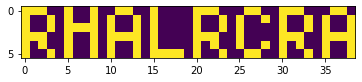

In [93]:
# Not mine
points = np.loadtxt('data/input13.txt',dtype=int,delimiter=',',max_rows=908)
folds = np.loadtxt('data/input13.txt',dtype=str,delimiter='=',skiprows=909)
folds[:,0] = [i[-1] for i in folds[:,0]]
for axis,value in zip(folds[:,0],folds[:,1].astype(int)):
    for point in range(len(points)):
        if axis == 'x':
            if points[point][0] > value:
                new_value = points[point][0] - 2 *(points[point][0] - value)
                points[point] = np.array([new_value,points[point][1]])
        elif axis == 'y':
            if points[point][1] > value:
                new_value = points[point][1] - 2 *(points[point][1] - value)
                points[point] = np.array([points[point][0],new_value])

picture = np.zeros([6,np.max(points)+1])
for p in points:
    picture[p[1],p[0]] += 1

plt.imshow(picture > 0)